In this session what I'll be doing is load some dummy data, and run the linear regression algorithm that we get from sklearn, and once we do that I want to look at the line that's created. And compare it along with the training data that we gave, how good or bad it fits the data, and then let's see how good or bad it predicts on the testing data as well.

In [160]:
# Load data
# I have already added the file data.csv in same folder as my notebook
import numpy as np

data = np.loadtxt('data.csv', delimiter=",")

In [161]:
data.shape

(100, 2)

By looking at the results of shape of the data we find that there are 100 rows and 2 columns -  first column is x and the second column is y. So I'm taking only one dimensional input and the reason for that is I just want to make sure that we can plot it.

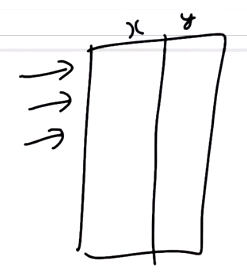

In [162]:
# Split the data to get x and y
x = data[:, 0]
y = data[:, 1]

In [163]:
x.shape

(100,)

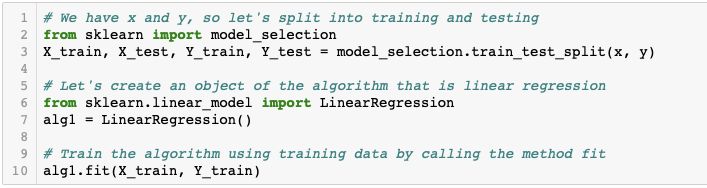

When we run this it's not going to work, its going to give us an error. 

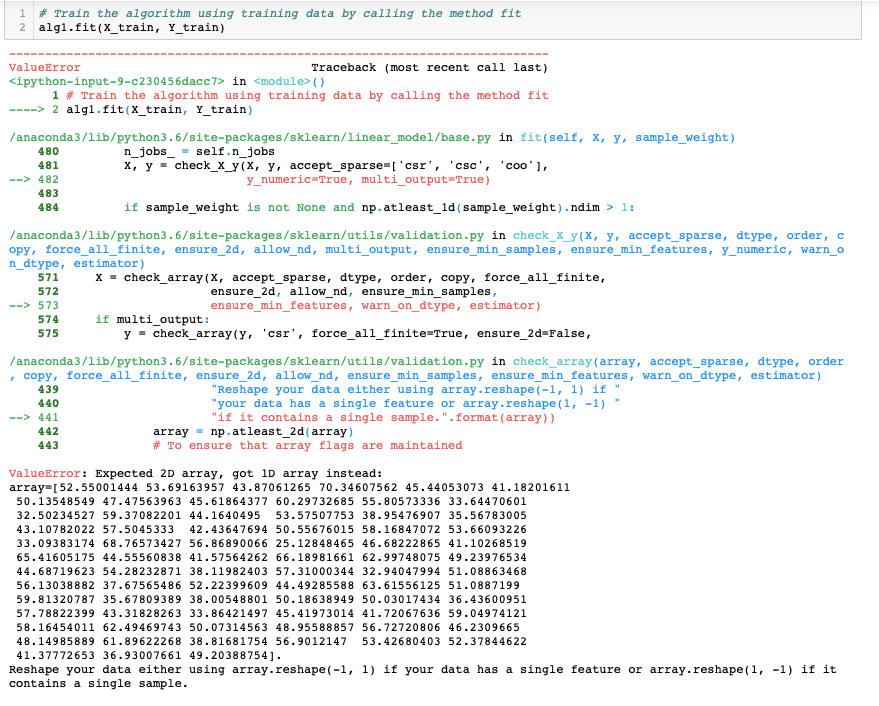

The error it gives us is saying that it wanted a 2D array input but got a 1D array instead. That's true because we gave x which was a 1D array. But it's saying that it wants x to be at least a 2D array. Basically, if you have anything with more than one feature (in most of the cases you will have more than one feature), this is how it wants the data to be.

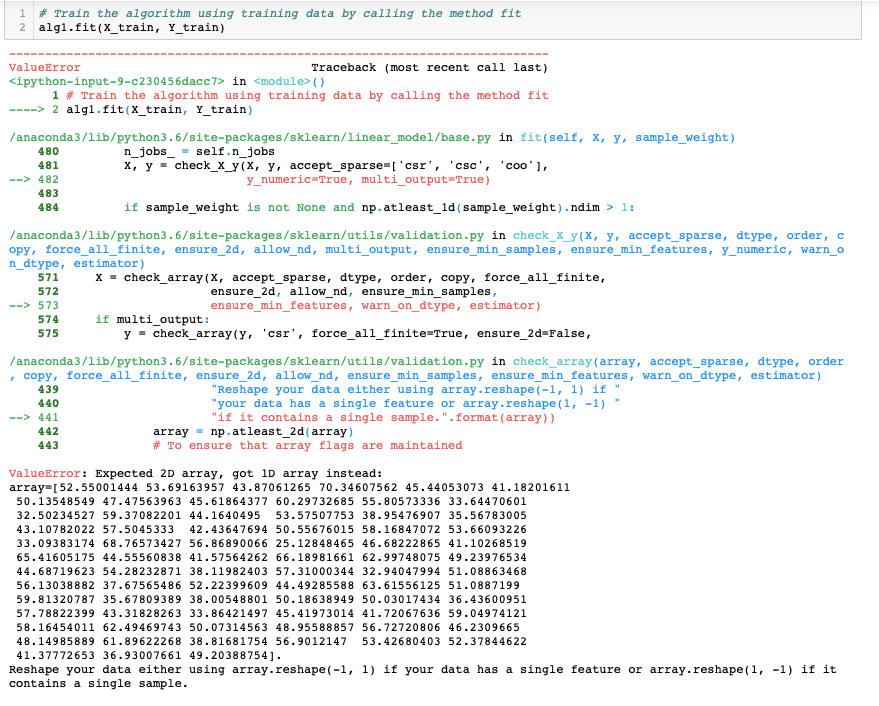

One option that we have is that we can convert this 1D array into a 2D array like as show in the image below.

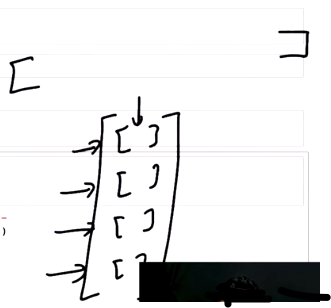

So it looks like you have these rows which have one column.

So there is a function called reshape, so you can reshape your data into some other shape. It's actually giving you a solution in the error stack trace.

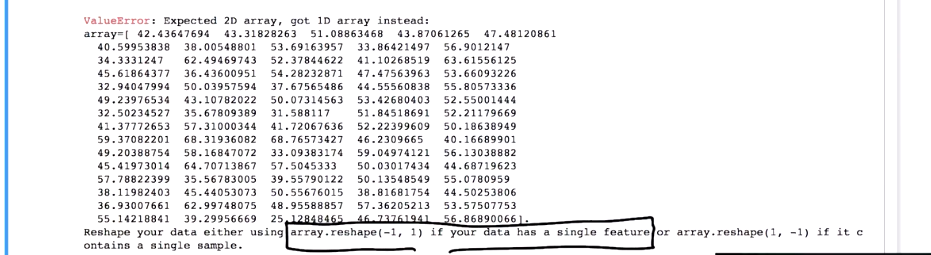

It's saying that if your data has a single feature which is the case with us you can use reshape function. Function reshape(-1, 1) means that it needs 1 column, it will calculate the number of rows by itself.

In [164]:
x = data[:, 0].reshape(-1, 1)
y = data[:, 1]

In [165]:
x.shape

(100, 1)

In [166]:
# We have x and y, so let's split into training and testing
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, y)

# Lets create an object of algorithm that is linear regression
from sklearn.linear_model import LinearRegression
alg1 = LinearRegression()

# Train the algorithm using training data by calling the method fit
alg1.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

This time we were able to fit it. So now that you have fitted what should have happened? Linear regression should have used this data to figure out this line y = mx + c.

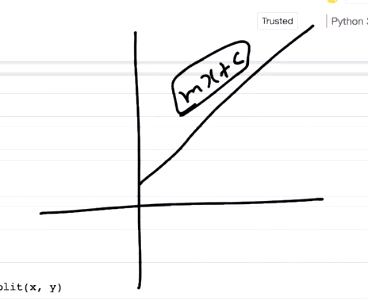

To look at this m and c there is actually a way.

In [167]:
# Find slope m
alg1.coef_

array([1.28678114])

In [168]:
# Find intercept c
alg1.intercept_

10.849964110516034

So this is what it has trained, these are the parameters that it has calculated.

Now let's plot our training data along with these parameters. So what do I want to plot? Let's first figure out that. I want to scatter all my training data points and then I want to draw the line of best fit.
- So there are two things that I want to do. I have two different datasets, effectively datapoints that I want to draw. For the line let's just use m and c to plot it. Let's plot this line somehow and then we will scatter these points and these points will be X_train, Y_train.

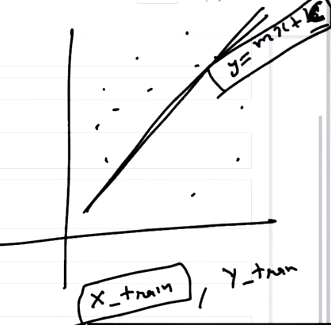

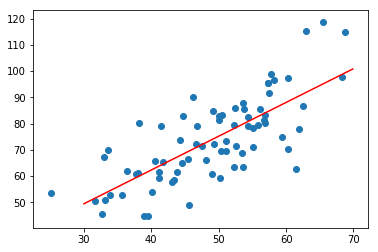

In [169]:
import matplotlib.pyplot as plt
%matplotlib inline

m = alg1.coef_[0]
c = alg1.intercept_

x_line = np.arange(30, 70, 0.1)
y_line = m * x_line + c
plt.plot(x_line, y_line, "r")
train_1d = X_train.reshape(75)
plt.scatter(X_train, Y_train)
plt.show()

It seems the best fit line is correct with respect to the training data and the algorithm is doing reasonably well. Let's plot the best fit line for testing data as well.

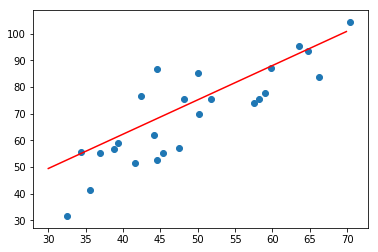

In [170]:
# Let's plot the line for testing data as well.
m = alg1.coef_[0]
c = alg1.intercept_

x_line = np.arange(30,70,0.1)
y_line = m * x_line + c
plt.plot(x_line, y_line, "r")
train_1d = X_test.reshape(25)
plt.scatter(X_test, Y_test)
plt.show()

### Coefficient of Determination

We used the 75 data points (training data) to learn this line and the idea is that the line should reasonably perform well for the rest of the data (testing data) as well because they're coming from the same data source.

So far to see how good or bad the algorithm is performing we were just drawing a line and see how far the actual data points are from the line. That's actually not the best way to try and find how the algorithm is performing. The biggest problem with this is that let's say we have a data set which has n features. If you have n features it will be almost impossible for us to plot these n features against the output. So, we can look at 2-dimensional graphs and understand what exactly is going on, we can try and understand 3D graphs well, but anything more than that, it will not be possible for us. So we need an objective way of finding out how good or bad our algorithm is performing. We need a way to compare y_pred against the actual output and objectively come to a score. So getting to that score is very very important for us to compare different algorithms and also to see for generic n feature dataset how our algorithm is performing. So we need a way to find out the score to find out how good or bad our predictions are.

Let's say the actual and predicted outcomes are as given in the image below. So the way we are going to score our algorithm is using Coefficient of Determination.

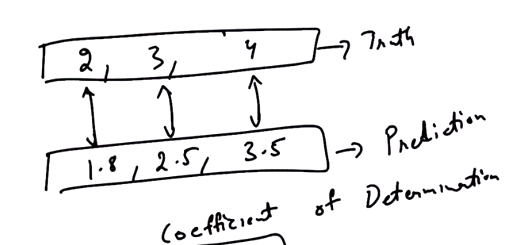
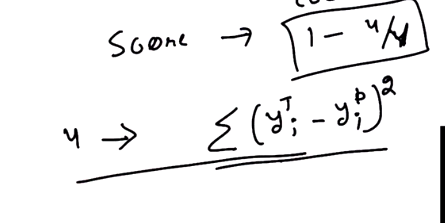
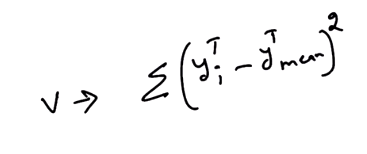

u signifies the error in your predictions and v signifies if your predictions were effectively the mean.

So the basic idea here is that we want to score to be between 0 and 1, where higher value is considered better i.e. higher the score better it is. In scikit learn we have a function score.

Let's see the score on the test data and training data.

In [171]:
score_test = alg1.score(X_test, Y_test)
score_train = alg1.score(X_train, Y_train)
score_test, score_train

(0.6553155827438765, 0.5624947040398233)

So it seems like we're doing pretty decent on both of them, it's not very good but it's okay. How do you say whether score is good or not? It is dependent on the data that you have. Some data will be happy with a score of .7 or .6, in other case we might not be happy with a score of .9 as well. It just depends on the data. But apparently in this case we are getting a high score for testing data as compared to training data. But we got the best line with respect to the training data and it seems like the testing data also fits it pretty well. So that's the scores we are getting which have been calculated using the coefficient of determination. Another thing to remember is that train_test_split method is doing a random split, so if you run the whole code again you might get very different scores. It's basically going to be the case that the second time you run the code you will get different data points in your testing data compared to what you had in the first run, so you might get completely different m and c values. And you might get completely different scores as well, because your data points in testing and training data might change as well.

### Cost Function

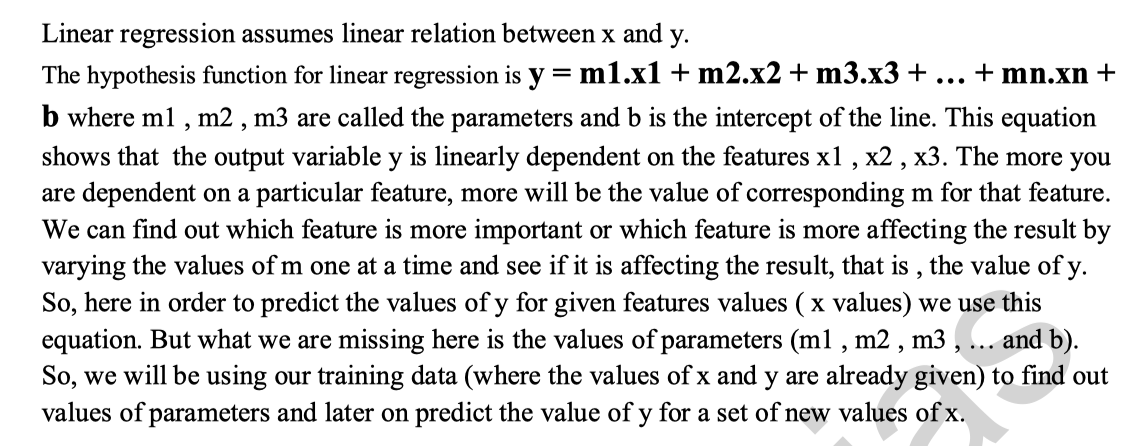

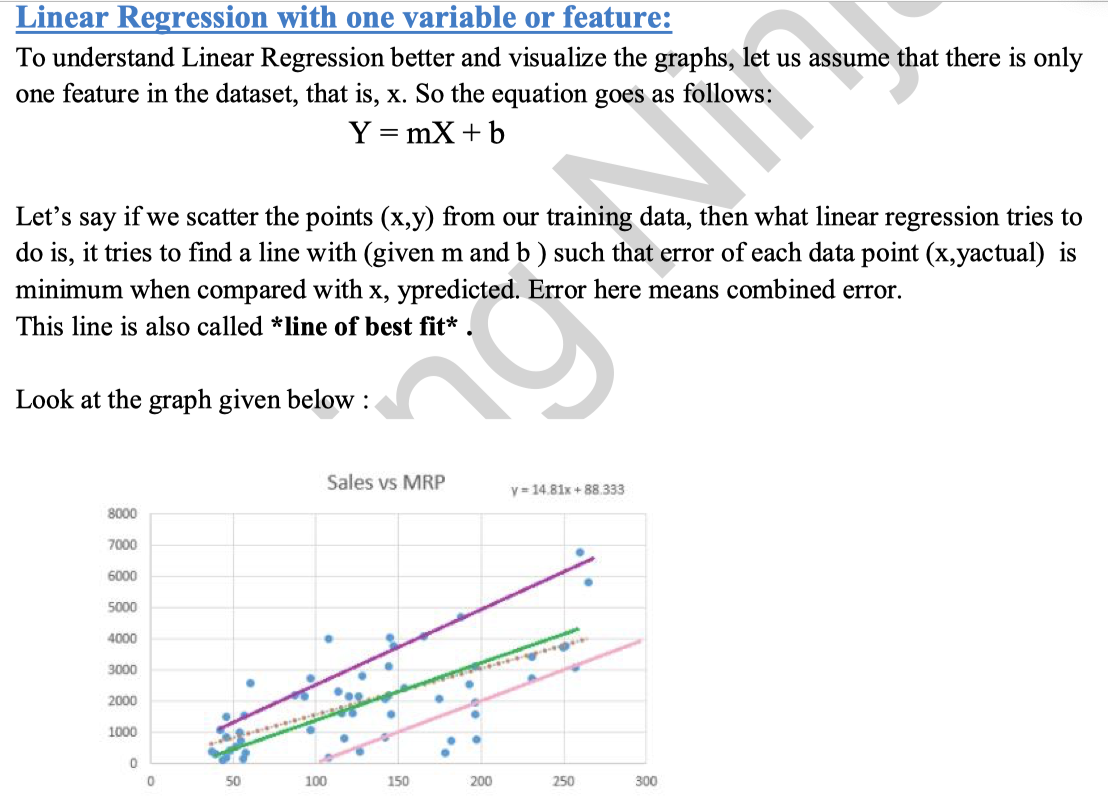

Here it is difficult to find out the line of best fit just by looking at the different lines. So our algorithm finds out the m and b for the line of best fit by calculating the combined error function and minimizing it. There can be three ways of calculating error function:

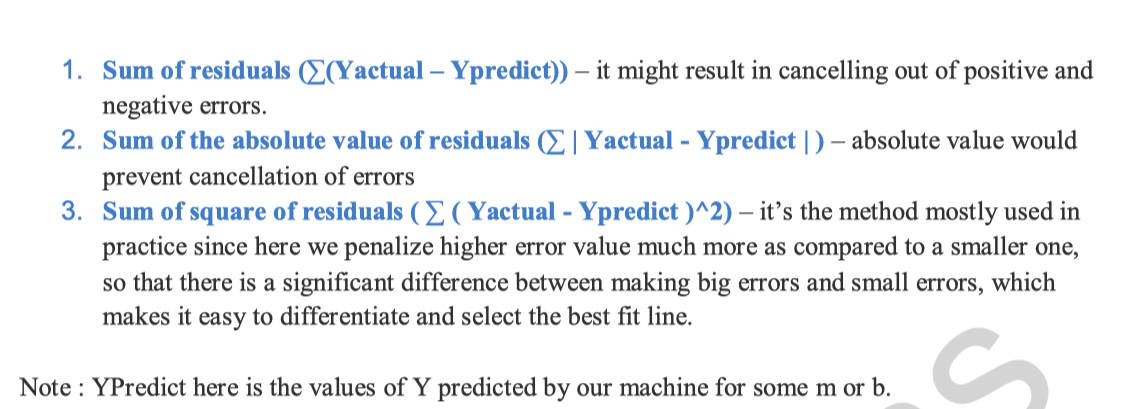